# Part I - Prosper Loan Data Exploration
## by Olamide SHOGBAMU

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load Prosper Loan dataset
url = "https://raw.githubusercontent.com/TheSHOGBAMU/Data_Visualization/26116c78932bbf835ce492da3635072c302fe75d/ProsperLoanData.csv"

dataset = pd.read_csv(url)

In [3]:
# high-level overview of data shape and composition

print(dataset.shape)
print(dataset.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [4]:
dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# descriptive statistics for numeric variables

dataset[['Term', 'BorrowerAPR', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'TotalProsperLoans']].describe()

,Term,BorrowerAPR,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,TotalProsperLoans
count,113937.000000,113912.000000,84853.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,22085.000000
mean,40.830248,0.218828,0.096068,5.950067,0.275947,5.608026e+03,8337.01385,1.421100
std,10.436212,0.080364,0.030403,2.376501,0.551759,7.478497e+03,6245.80058,0.764042
min,12.000000,0.006530,-0.182700,1.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.156290,0.074080,4.000000,0.140000,3.200333e+03,4000.00000,1.000000
50%,36.000000,0.209760,0.091700,6.000000,0.220000,4.666667e+03,6500.00000,1.000000
75%,36.000000,0.283810,0.116600,8.000000,0.320000,6.825000e+03,12000.00000,2.000000
max,60.000000,0.512290,0.283700,11.000000,10.010000,1.750003e+06,35000.00000,8.000000


In [6]:
sum(dataset[['ListingKey', 'ListingNumber', 'LoanNumber', 'LoanKey']].duplicated())

871

In [7]:
dataset[['ListingKey', 'ListingNumber', 'LoanNumber', 'LoanKey']].drop_duplicates(inplace=True)

C:\Users\TGS_PC\AppData\Local\Temp\ipykernel_9272\4141240089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['ListingKey', 'ListingNumber', 'LoanNumber', 'LoanKey']].drop_duplicates(inplace=True)


In [8]:
# convert Occupation, color, and clarity into ordered categorical types
dict = {'Occupation': ['Other', 'Professional','Computer Programmer','Executive','Teacher','Adminstrative Assistant'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Others', 'Part-time', 'Not employed', 'Retired']}

for var in dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict[var])
    dataset[var] = dataset[var].astype(ordered_var)

In [9]:
dataset['Occupation'].value_counts()

Other                      28617
Professional               13628
Computer Programmer         4478
Executive                   4311
Teacher                     3759
Adminstrative Assistant        0
Name: Occupation, dtype: int64

### Structure of the dataset?

> There are 113937 unique loans in the dataset with 81 features (ListingKey, ListingNumber, ListingCreationDate, Term, LoanStatus, BorrowerAPR etc. run `print(list(dataset.columns.values))` to see all columns.

> The dataset is a quantitative dataset as most of the data are numerical discrete data. Some categorical features in the data are Occupation, ListingCategory, GroupKey and so on.


> In this project, I will be looking into Loan Status, Listing Category and factors that affects the outcome of loans (Loan Yeild). Features like Borrowers APR, Prosper Score, Occupation, Is borrower a home owner and more will be useful in this finding.

In [10]:
#duplicate the dataset

df = dataset.copy()

In [11]:
def plot_styles(ax, title='TITLE', hideAxes=True, direction='v', rotateTextdeg=0):

    if direction == 'v':
        for p in ax.patches:
            bar_length = round(p.get_height(), 4)
            ax.annotate(str(bar_length), xy=(p.get_x() + p.get_width() / 2.0, bar_length),
            xytext=(3, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            rotation = rotateTextdeg
                       )
    elif direction == 'h':
        for p in ax.patches:
            bar_length = round(p.get_width(), 4)
            ax.annotate(str(bar_length), xy=(bar_length, p.get_y() + (p.get_height() / 2.0)),
            xytext=(25, 1),
            textcoords='offset points',
            ha='center',
            va='center_baseline',
            rotation = rotateTextdeg
                                )
    else:
        print('Not Annotated!')


    if hideAxes:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    title_obj = ax.set_title(f'{title}', pad=20, fontsize=15)
    plt.setp(title_obj, color='#1D2951');

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: Loan Amount

In [12]:
#bin the loan amount into classes
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

#get the frequency of each loan class
LoanAmount = pd.cut(df['LoanOriginalAmount'], bins=bins).value_counts(sort=False)

In [13]:
LoanAmount.reset_index(name="count").head()

,index,count
0,"(0, 1000]",3206
1,"(1000, 2000]",9334
2,"(2000, 3000]",11024
3,"(3000, 4000]",18834
4,"(4000, 5000]",9426


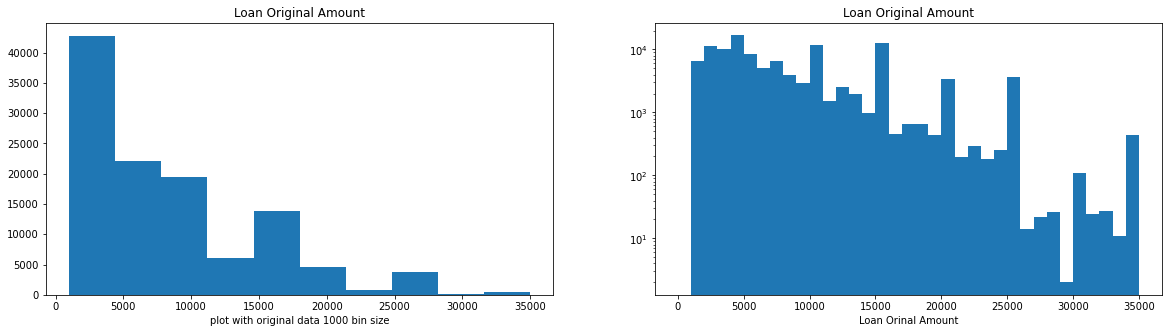

In [14]:
plt.rcParams["figure.figsize"] = (20,5)

#Plot histogram
plt.subplot(1, 2, 1)
plt.hist(data=df, x='LoanOriginalAmount');
# Display a label on the x-axis
plt.xlabel('plot with original data 1000 bin size')
plt.title('Loan Original Amount')

# plot 2nd histogram 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
plt.title('Loan Original Amount');

plt.yscale('log')
plt.xlabel('Loan Orinal Amount');

- This plot show the distribution loan amount. The plot shows that the most loaned amount is between the range of 1000 and 3000

> Next, I will look at the Listing Category Feature

In [15]:
#rename the column to remove the white space in the name

df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [16]:
# replace each number in the column with the category they represent

category_list = {0:'Not available', 1:'Debt Consolidation', 2:'Home improvement', 3:'Business', 4:'Personal loan', 5:'Student use', 6:'Auto', 7:'Others', 8:'Baby and Adoption', 9:'Boat', 10:'Cosmetics procedure', 11:'Engagement ring', 12:'Green loan', 13:'Household expenses', 14:'Large purchases', 15:'Medical or Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding'}
df.replace({"ListingCategory": category_list}, inplace=True)

df['ListingCategory'].sample(5)

99308     Debt Consolidation
112473                Others
23941     Debt Consolidation
61810     Debt Consolidation
62435     Debt Consolidation
Name: ListingCategory, dtype: object

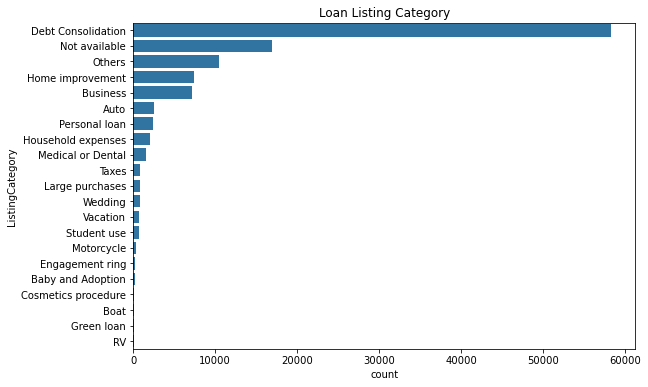

In [18]:
plt.rcParams["figure.figsize"] = (9,6)
#fig.autofmt_xdate(rotation=45)

default_color = sb.color_palette()[0]
ls_order = df['ListingCategory'].value_counts().index
sb.countplot(data = df, y = 'ListingCategory', color = default_color, order=ls_order)
plt.title('Loan Listing Category')

plt.show()

- This plot shows us that most people borrow money to pay debt, while a good number number of people choose not to disclose it.

In [19]:
# plots the same chart from above proportion on the bars
# gets the maximum proportion
n_listing = df['ListingCategory'].value_counts().sum()
max_list_count = df['ListingCategory'].value_counts()[0]
max_proportion = max_list_count / n_listing
print(max_proportion)

#create a spread element within the max proportion
tick_props = np.arange(0, max_proportion, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

0.5117564970115064


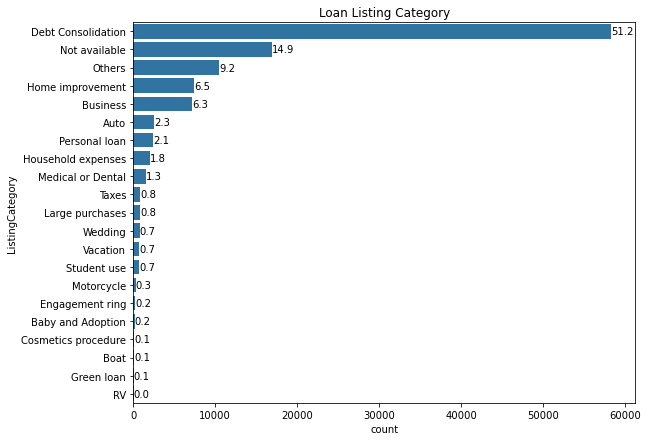

In [20]:
plt.rcParams["figure.figsize"] = (9,7)
sb.countplot(data=df, y='ListingCategory', color=default_color, order=ls_order);
plt.title('Loan Listing Category')
# print the proportion text on the bars
for i in range (df['ListingCategory'].value_counts().shape[0]):
    
    count = df['ListingCategory'].value_counts()[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_listing)
    # Print the string value on the bar. 

    plt.text(count+1, i, pct_string, va='center')

- I went ahead to make the plot more descriptive by adding the proportions in front of each bar

> Employment Status

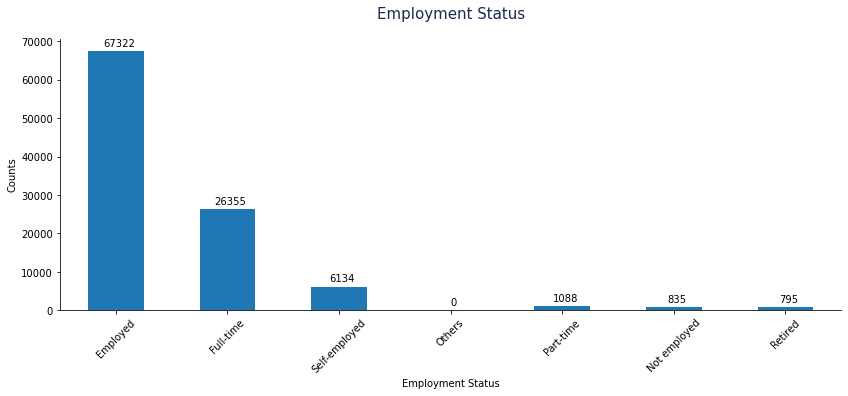

In [21]:
# Employment status plot.

plt.figure(figsize=(14, 5))
ax = df['EmploymentStatus'].value_counts().sort_index().plot(kind='bar')
plot_styles(ax, title='Employment Status', direction='v', rotateTextdeg=0)
plt.xlabel('Employment Status')
plt.ylabel('Counts')
plt.xticks(rotation=45);

- Most of the Borrowers are Employed, most of them full time employment and others self employment

> Next, I will visualise the loan status column

In [22]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

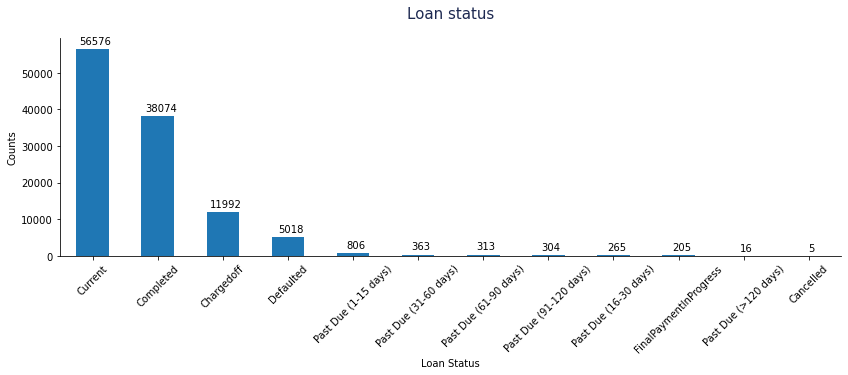

In [23]:
plt.figure(figsize=(14, 4))
ax = df['LoanStatus'].value_counts().sort_values(ascending = False).plot(kind='bar');
plot_styles(ax, title='Loan status', direction='v', rotateTextdeg=0);
plt.xticks(rotation=45);
plt.xlabel('Loan Status')
plt.ylabel('Counts');

- The data can be cleaned and all the past dues will be kept under one past due 

In [24]:
df['LoanStatus'] = df['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                            'Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
df['LoanStatus'] = df['LoanStatus'].replace('FinalPaymentInProgress', 'InProgress')

In [25]:
df['LoanStatus'].value_counts()

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2067
InProgress      205
Cancelled         5
Name: LoanStatus, dtype: int64

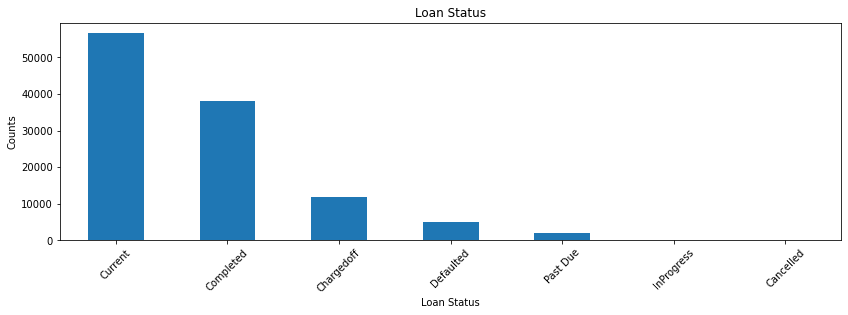

In [26]:
plt.figure(figsize=(14, 4))
ax = df['LoanStatus'].value_counts().sort_values(ascending = False).plot(kind='bar');
#decorate_barPlots(ax, title='Loan status', direction='v', rotateTextdeg=0);
plt.xticks(rotation=45)
plt.title('Loan Status');
plt.xlabel('Loan Status')
plt.ylabel('Counts');

- The plot shows that Current status has got the highest number of listings followed by Completed and Chargedoff. Other statuses include Past Due, InProgress and cancelled with very low frequency

> Prosper Score of the customer based on past performance

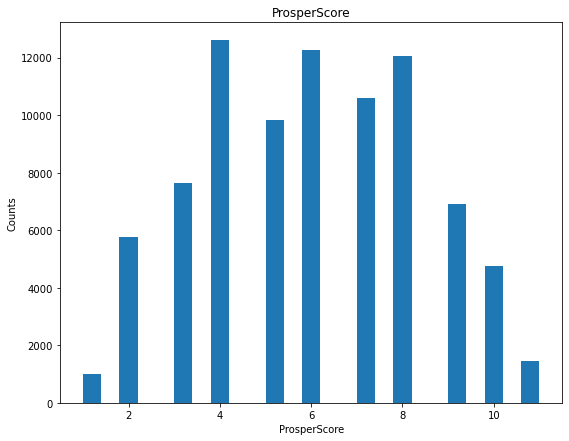

In [27]:
df['ProsperScore'].hist(grid = False, bins = 25)
plt.title('ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('Counts');

- The plot above shows that we some outliers in the prosper score column. I will go ahead and plot the bar again

In [28]:
df['ProsperScore'] = df[df['ProsperScore'] <= 10]['ProsperScore']

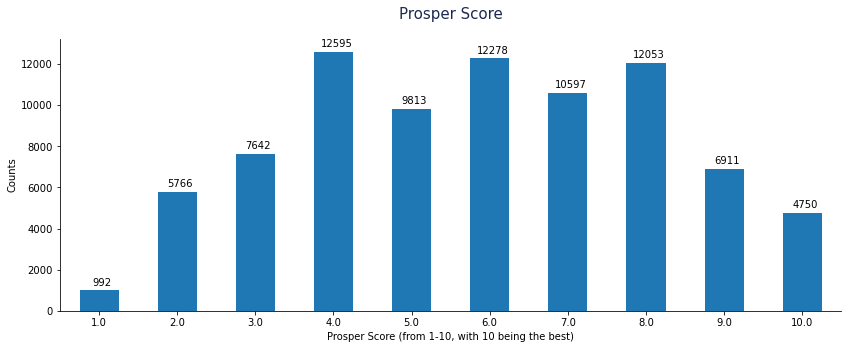

In [29]:
plt.figure(figsize=(14, 5))
ax = df['ProsperScore'].value_counts().sort_index().plot(kind='bar')
plot_styles(ax, title='Prosper Score', direction='v', rotateTextdeg=0)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)')
plt.ylabel('Counts')
plt.xticks(rotation=0);

- Most customer have a prosper score 4 followed by 6. This customer risk score is based on the performance of the customer in the past.

C:\Users\TGS_PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\TGS_PC\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\TGS_PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\TGS_PC\anaconda3\lib\site-

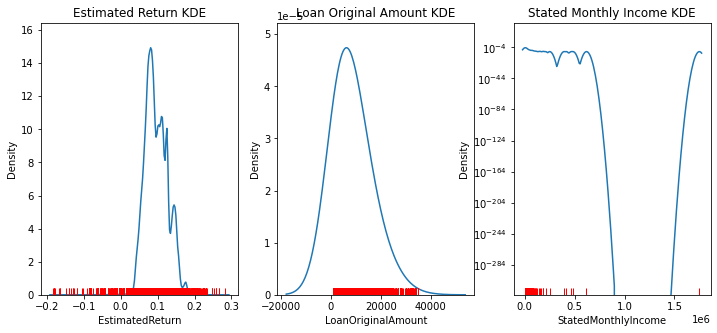

In [30]:
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(df['EstimatedReturn'], hist = False, rug = True, rug_kws = {'color' : 'r'})
plt.title('Estimated Return KDE');

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(df['LoanOriginalAmount'], hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})
plt.title('Loan Original Amount KDE');

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(df['StatedMonthlyIncome'], hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1, 'kernel' : 'tri'})
plt.title('Stated Monthly Income KDE')
plt.yscale('log')

- From the above plots, We can say that the Estimated Return and Loan Amount are continuous while the Monthly Income is not

> I'll explore waffle plot to visualize the employment categories of different individual

In [31]:
#waffle plot for employment category

def percentage_blocks(df, var):
    
    # compute base quotas
    percentages = 100 * df['EmploymentStatus'].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for emp in decimal.index[:rem]:
        counts[emp] += 1

    return counts

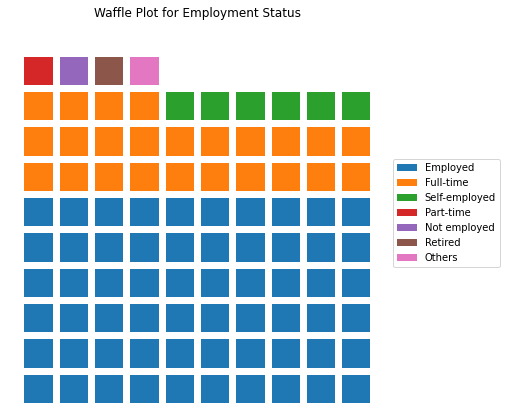

In [32]:
waffle_counts = percentage_blocks(df, 'emp_var')

prev_count = 0
# for each category,
for emp in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[emp])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[emp]
    
    # aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);
plt.axis('off')
plt.axis('square');
plt.title('Waffle Plot for Employment Status');

- The above plot shows that employed individuals are highest category of people who applyb for prosper loan followed full time employed individual. conversely, the retired category and other are least category with loan customers.

> I'll move further to comparing the null values of different features with a bar chart.

In [33]:
# Select the column of interest to investigate
na_counts = df[['LoanOriginalAmount', 'EmploymentStatus', 'EstimatedEffectiveYield', 'BorrowerState', 'CreditGrade', 'TotalProsperLoans', 'Occupation', 'ProsperScore', 'TotalProsperLoans', 'LoanStatus']].isna().sum()
print(na_counts)

LoanOriginalAmount             0
EmploymentStatus           11408
EstimatedEffectiveYield    29084
BorrowerState               5515
CreditGrade                84984
TotalProsperLoans          91852
Occupation                 59144
ProsperScore               30540
TotalProsperLoans          91852
LoanStatus                     0
dtype: int64


C:\Users\TGS_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


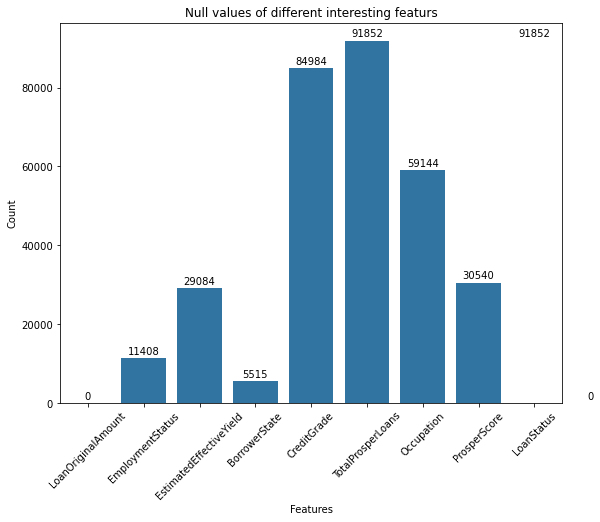

In [34]:
na_order = na_counts.value_counts().index

sb.barplot(na_counts.index.values, na_counts, color=default_color)

# get the current tick locations and labels
plt.xticks(rotation=45) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.xlabel('Features'); plt.ylabel('Count');
plt.title('Null values of different interesting featurs');

- The plot above compare the null values of different feature that are found important for this project. Total Prosper Loan has been found to the greatest null record.

## Bivariate Exploration

> I'll start by looking at the pairwise correlation between the features of interest

In [35]:
#Numeric variables and categorical variables

numeric_vars = ['Term', 'BorrowerAPR', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'TotalProsperLoans']
categoric_vars = ['BorrowerState', 'EmploymentStatus', 'ListingCategory']

> Scatter plot

df.shape= (113937, 81)
df_samp.shape= (500, 81)


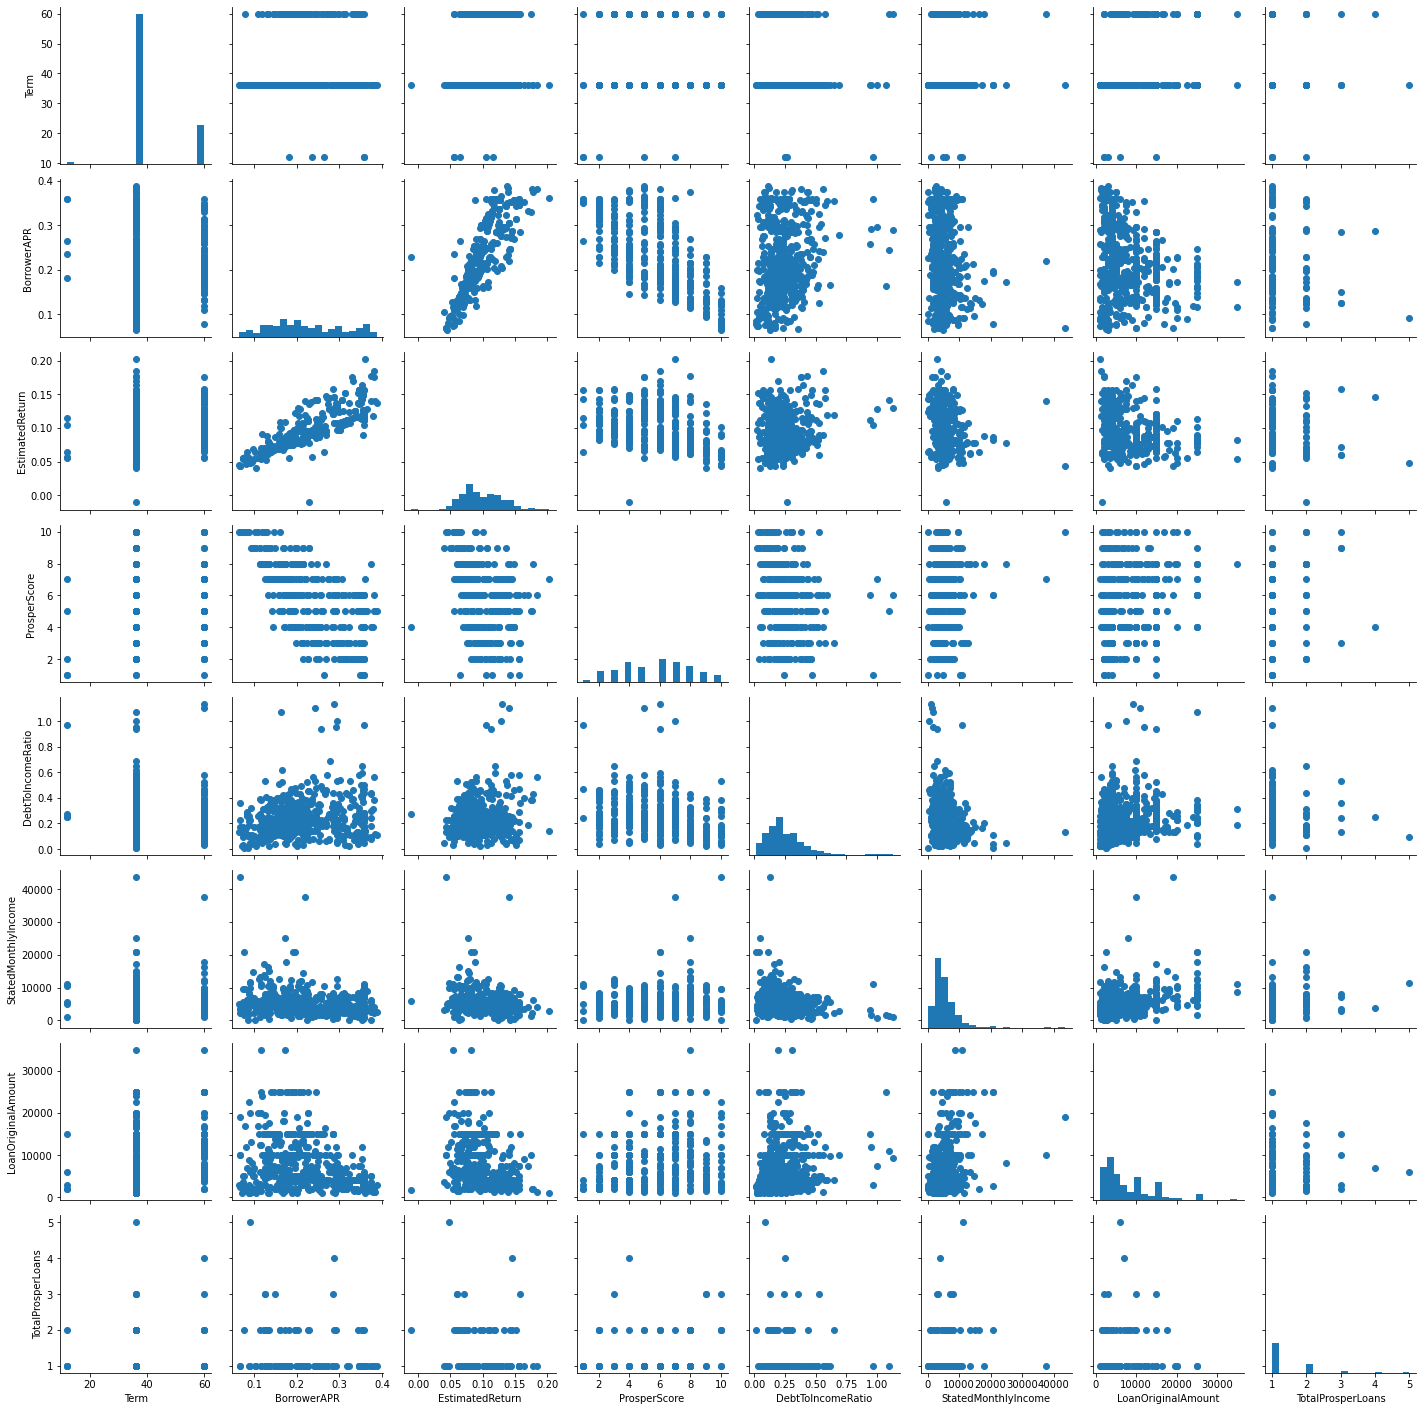

In [36]:
# plot matrix: sample 500 loans on numeric variables with 20 bin size

print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

- Most of the scatter correlation plot have shown to be linear, I will highlight the correlation between Estimated Return and Rate which is a positive correlation

> Correlation between Borrowers Rate and Estimated Return

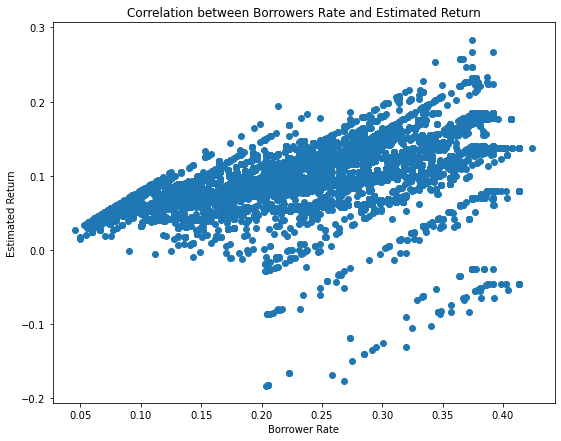

In [37]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'EstimatedReturn');
plt.title('Correlation between Borrowers Rate and Estimated Return')
plt.xlabel('Borrower Rate')
plt.ylabel('Estimated Return');

- The scatter plot above informs us that the relation between the Borrower Rate and the Estimated Return is a positive correlation. The high the rate implies an higher expected return.

> Heat Map

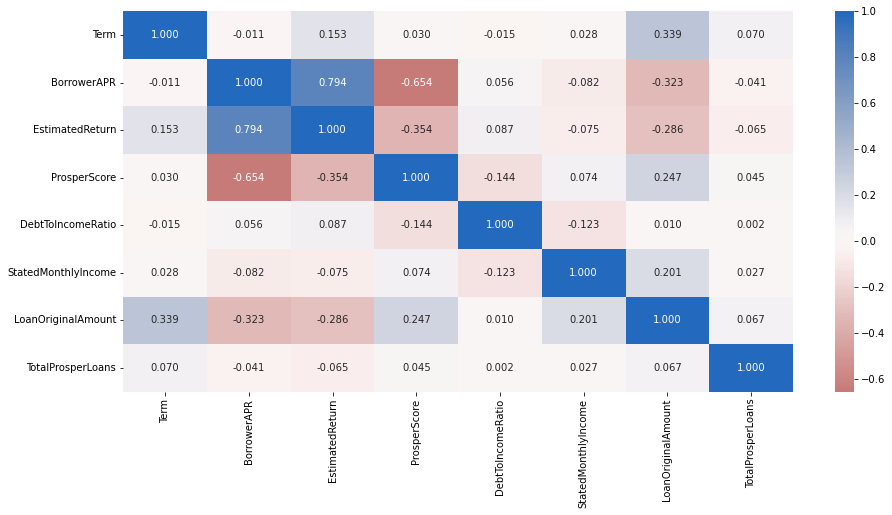

In [39]:
# correlation plot
plt.figure(figsize = [15, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

- The same information we get from the scatter plot is being captured here to. The pair relationship between most of the variables are linear. However, Debt to IncomeRatio is not.

> Relation Between Loan Status and Term

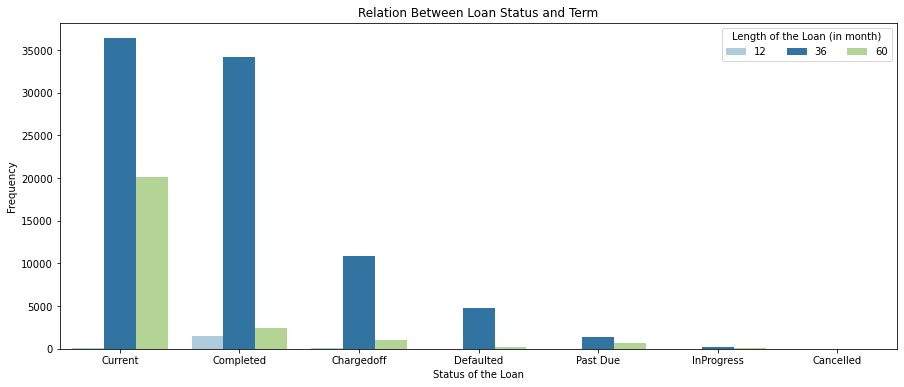

In [40]:
plt.figure(figsize = (15,6))
ax = sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = "Paired", order = df['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.title('Relation Between Loan Status and Term')
plt.xlabel('Status of the Loan')
plt.ylabel("Frequency");

- The most common loan term is 36 month and least common is 60 month. Although the current loan also has the longest term, the two variables are independent of each other

> Relation Between Borrower State and Employment Status

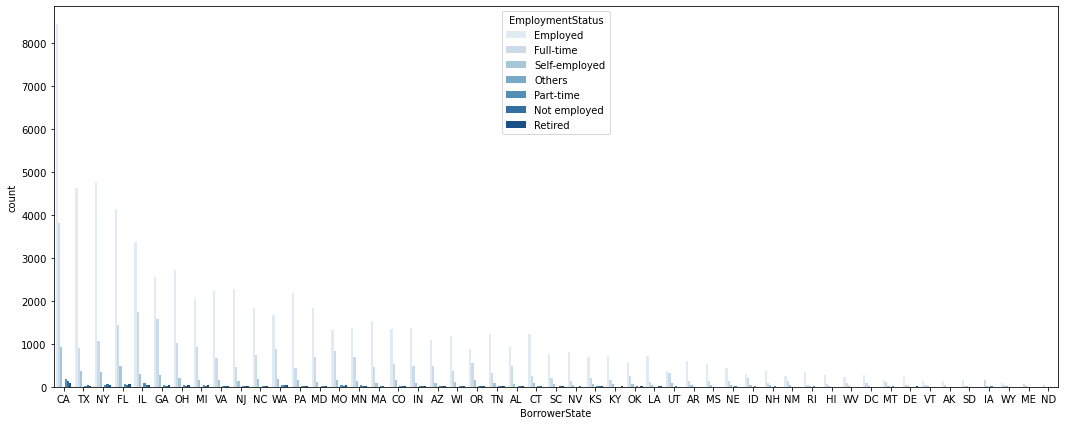

In [50]:
plt.figure(figsize = [17, 7])
sb.countplot(data = df, x = 'BorrowerState', hue = 'EmploymentStatus', palette = 'Blues', order = df['BorrowerState'].value_counts().index)

plt.show()

- Califonia has the most employed loan borrowers, followed by Texas and New York

## Multivariate Exploration

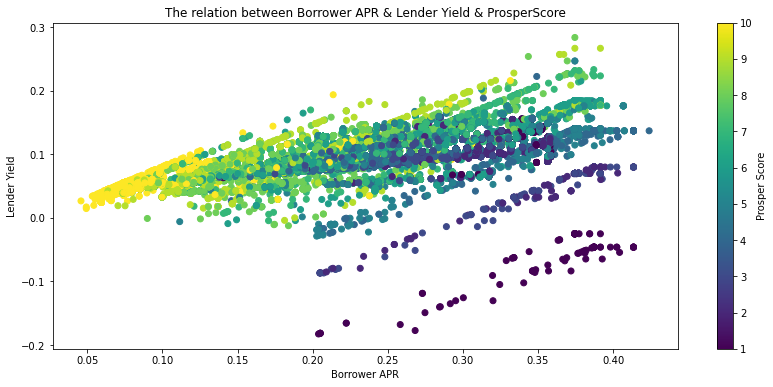

In [42]:
plt.figure(figsize=[14,6])
plt.scatter(data=df,x="BorrowerAPR",y = "EstimatedReturn", c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

- We are informed from the plot that loans with low prosper score has high annual rate. There are no less that zero lenders yield. The higher the prosper score the higher the lender yield.

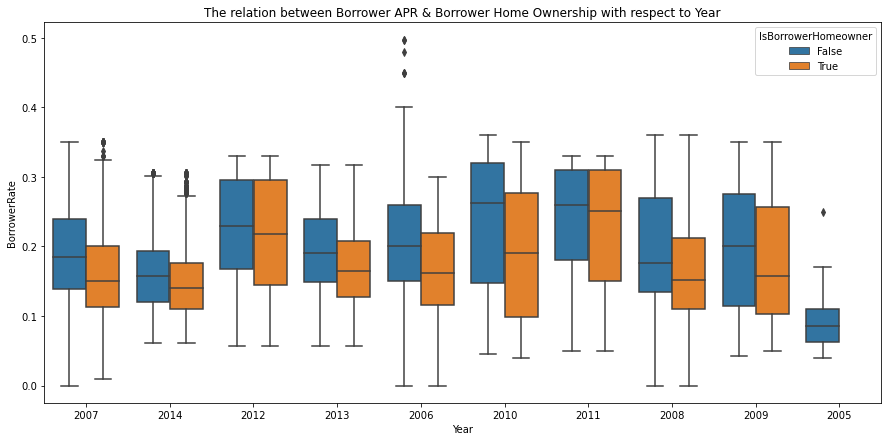

In [43]:
df['Year'] = df['ListingCreationDate'].str.split('-').str[0]
g = sb.boxplot(data=df, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner')
plt.title("The relation between Borrower APR & Borrower Home Ownership with respect to Year");
g.figure.set_figwidth(15)
g.figure.set_figheight(7)

- The multivariate plot shows us that the number of non home owners are more that home owners, however there a growth trend in home ownership overtime.